# Gradient Descent

In [41]:
import itertools
import numpy as np
import matplotlib.pyplot as plt

from operator import itemgetter

## Generate $n$D Data

In [43]:
def generate_data_nD(length, n, A):
    
    # Initialize series
    series = np.array(np.zeros((length, n)))
    
    # Precalculate inverse
    inv_P = np.linalg.inv(P)
    
    # Generate series
    for t in range(1, length):
        # Generate VAR model
        series[t] = np.matmul(inv_P, np.matmul(A, np.matmul(P, series[t - 1])) + np.random.multivariate_normal(np.zeros(n), np.identity(n)))
    
    return series

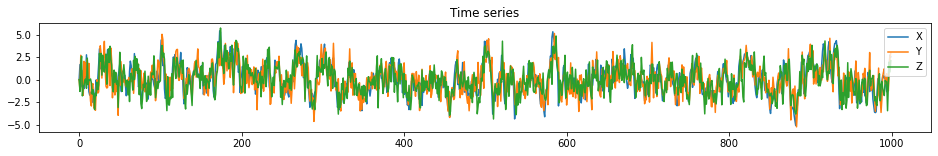

Actual A:
 [[0.8 0.  0. ]
 [0.7 0.1 0. ]
 [0.7 0.  0.1]]

Actual P:
 [[1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]]


In [82]:
np.random.seed(seed = 123)

length, n = 1000, 3

# A matrix, lower triangular
A = np.tril(np.random.rand(n, n)) / n

# This A has negative values, which increases the difference in cost value between other Ps
# A = np.tril(np.random.uniform(-1, 1, n ** 2).reshape((n, n)))

# This 3D A has two equally valid Ps, the second and third row can be interchanged
A = np.array([[0.8, 0.0, 0.0], [0.7, 0.1, 0.0], [0.7, 0.0, 0.1]])

# Permutation matrix
P_list = np.array(list(itertools.permutations(np.identity(n))))
P = P_list[np.random.choice(len(P_list))]

# Generate nD data
series = generate_data_nD(length, n, A)

# Plot
plt.figure(figsize=(16,2))
plt.title("Time series")
plots = plt.plot(series)
plt.legend(plots, ["X", "Y", "Z"], loc=1)
plt.show()

print("Actual A:\n", A)

print("\nActual P:\n", P)

## Cost function
$$C(P, A) = \mathbb{E}\left[\sum_{t = 2}^T\frac{1}{T - 1}\left\lVert P\mathbf{X}_t - AP\mathbf{X}_{t-1}\right\rVert_ 2^2\right]$$

In [53]:
def C_n(variables):
    P, A  = variables
    cost = 0
    
    for t in range(1, length):
        val = np.matmul(P, series[t])
        est = np.matmul(A, np.matmul(P, series[t - 1]))
        cost += np.linalg.norm(val - est) ** 2
    
    return cost / (length - 1)

## Expected cost when $P$ a permutation matrix
\begin{align*}\mathbb{E}\left[\sum_{t = 2}^T\frac{1}{T - 1}\left\lVert P\mathbf{X}_t - AP\mathbf{X}_{t-1}\right\rVert_ 2^2\right] &= \mathbb{E}\left[\sum_{t = 2}^T\frac{1}{T - 1}\left\lVert AP\mathbf{X}_{t - 1} + \Sigma - AP\mathbf{X}_{t-1}\right\rVert_ 2^2\right] \\
&= \left \lVert \Sigma \right \rVert_2^2 \\
&= n\sum_{i = 1}^n \sigma_i^2,
\end{align*}
where $\sigma_i$ is the variance of the $i$th variable, assuming the covariance is a diagonal matrix.

In [81]:
# Compute cost of the ACTUAL P
print("Expected Cost:", str(n * 1), ", Optimal Cost:", round(C_n([P, A]), 3), "\n")

# Sort costs of the other permutation matrices and save in list
results = sorted([[C_n([P_i, A]), P_i] for P_i in P_list], key=itemgetter(0))

# Print best 5 permutation matrices ordered by minimum cost
for elem in results[:5]:
    print("Cost:", round(elem[0], 3))
    print("P w/ above cost:\n", elem[1], "\n")

Expected Cost: 3 , Optimal Cost: 3.135 

Cost: 3.135
P w/ above cost:
 [[1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]] 

Cost: 3.524
P w/ above cost:
 [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]] 

Cost: 5.213
P w/ above cost:
 [[0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]] 

Cost: 5.364
P w/ above cost:
 [[0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]] 

Cost: 5.715
P w/ above cost:
 [[0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]] 



### Conclusion
- Expected cost value is $\left \lVert \Sigma \right \rVert_2^2 = \sum_{i=1}^n \sigma_i^2$.
- Indeed, the generated $P$ is the permutation matrix that yields the optimal cost.
- When any $P$ is close, it is always two rows swapped, and when inspecting $A$, the corresponding entry is very small. This also indicates that there is not that much of a predictive power, hence both $P$s are okay.
- When two $P$ are equivalent (e.g. we have 1 -> 2 and 1 -> 3, and 2 <-/-> 3, both have the same value up to some randomness.